In [35]:
import django, os, sys, time, resource, re, gc, shutil
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from django.db.models import Count, Avg
from multiprocess import Pool
from functools import partial
import numpy as np
from functools import partial
from scipy.sparse import coo_matrix, csr_matrix, find, tril
import networkx as nx
import csv

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
qid = 1457

In [2]:
runs = list(range(352,362))
runs

[352, 353, 354, 355, 356, 357, 358, 359, 360, 361]

In [2]:

fname = "../data/topic_data/run_{}.xlsx".format(runs[0])

writer = pd.ExcelWriter(fname)

for i in range(1,len(runs)):

    topics1 = Topic.objects.filter(run_id=runs[i-1])
    topics2 = Topic.objects.filter(run_id=runs[i])

    df = pd.DataFrame.from_dict(list(topics2.values('title','id')))
    df['similarity'] = 0
    df['stopic'] = ""

    for t in topics2:
        scores = [0]
        titles = [""]
        t.top_words = Term.objects.filter(topicterm__topic=)
        for ct in topics1:
            score = len(set(t.top_words).intersection(set(ct.top_words)))
            if score>0:
                scores.append(score)
                titles.append(ct.title)

        
        m = max(scores)
        df.loc[df['id']==t.id,'similarity'] = m
        df.loc[df['id']==t.id,'stopic'] = titles[scores.index(max(scores))]


    df = df.sort_values('similarity',ascending=False)
    df.head()
    
    
    

    
    df.to_excel(writer,"run_{}".format(runs[i]))
    
writer.save()

In [3]:
runs = list(range(295,300))

writer = pd.ExcelWriter(fname)
fname = "../../data/topic_data/run_{}.xlsx".format(runs[0])

dynamic = True

for i in range(1,len(runs)):
    
    if dynamic==True:
        topics1 = DynamicTopic.objects.filter(run_id=runs[i-1])
        topics2 = DynamicTopic.objects.filter(run_id=runs[i])
    else:
        topics1 = Topic.objects.filter(run_id=runs[i-1])
        topics2 = Topic.objects.filter(run_id=runs[i])       

    df = pd.DataFrame.from_dict(list(topics2.values('title','id')))
    df['similarity'] = 0
    df['stopic'] = ""

    for t in topics2:
        scores = [0]
        titles = [""]
        for ct in topics1:
            score = len(set(t.top_words).intersection(set(ct.top_words)))
            if score>0:
                scores.append(score)
                titles.append(ct.title)

        
        m = max(scores)
        df.loc[df['id']==t.id,'similarity'] = m
        df.loc[df['id']==t.id,'stopic'] = titles[scores.index(max(scores))]


    df = df.sort_values('similarity',ascending=False)
    df.head()
    
    
    
    
    

    
    df.to_excel(writer,"run_{}".format(runs[i]))
    
writer.save()

In [63]:
runs = list(range(318,323))

runs.append(330)
runs.append(331)
runs.append(332)


#runs = [295,296,297]

col1s = []
col2s = []
ss = []
scols = []

for i in range(1,len(runs)):

    topics1 = Topic.objects.filter(run_id=runs[i-1])
    topics2 = Topic.objects.filter(run_id=runs[i])
    

    df = pd.DataFrame.from_dict(list(topics2.values('title','score')))
    
    df2 = pd.DataFrame.from_dict([{'title': 'None','score': 0}])
    
    df = df.append(df2)

    
    
    col1 = "run_{}_topics_{}".format(runs[i-1],topics1.count())
    
    scol = "scores_{}".format(runs[i])
    bscol = "scores_{}".format(runs[i-1])
    
    if i==1:
        scols.append(bscol)
    
    col1s.append(col1)
    scols.append(scol)
    
    col2 = "run_{}_topics_{}".format(runs[i], topics2.count())
    
    col2s.append(col2) 
    
    s = "similarity_{}-{}".format(runs[i-1],runs[i])
    ss.append(s)
    
    df = df.rename(columns = {'title': col2, 'score': scol})

    df[s] = 0
    df[col1] = "None"
    df[bscol] = 0

    for t in topics2:
        scores = [0]
        titles = [""]
        tscores = [0]
        for ct in topics1:
            score = len(set(t.top_words).intersection(set(ct.top_words)))
            if score>0:
                scores.append(score)
                titles.append(ct.title)
                tscores.append(ct.score)

        
        m = max(scores)
        df.loc[df[col2]==t.title, s] = m
        if m==0:
            df.loc[df[col2]==t.title, col1] = 'None'
        else:
            df.loc[df[col2]==t.title, col1] = titles[scores.index(max(scores))]
            df.loc[df[col2]==t.title, bscol] = tscores[scores.index(max(scores))]
            

    if i==1:   
        #df = pd.DataFrame.from_dict(list(topics2.values('title')))
        mdf = df
    else:
        mdf = mdf.merge(df,how="outer").fillna("")
    

columns = []
for i in range(len(col1s)):
    columns.append(col1s[i])
    columns.append(scols[i])
    columns.append(ss[i])
    if i == len(col1s)-1:
        columns.append(col2s[i])
        columns.append(scols[i+1])

print(columns)

mdf = mdf[columns]

mdf.head()



['run_318_topics_10', 'scores_318', 'similarity_318-319', 'run_319_topics_20', 'scores_319', 'similarity_319-320', 'run_320_topics_30', 'scores_320', 'similarity_320-321', 'run_321_topics_40', 'scores_321', 'similarity_321-322', 'run_322_topics_50', 'scores_322', 'similarity_322-330', 'run_330_topics_60', 'scores_330', 'similarity_330-331', 'run_331_topics_70', 'scores_331', 'similarity_331-332', 'run_332_topics_80', 'scores_332']


,run_318_topics_10,scores_318,similarity_318-319,run_319_topics_20,scores_319,similarity_319-320,run_320_topics_30,scores_320,similarity_320-321,run_321_topics_40,...,scores_322,similarity_322-330,run_330_topics_60,scores_330,similarity_330-331,run_331_topics_70,scores_331,similarity_331-332,run_332_topics_80,scores_332
0,"{soil, crop, fertil}",27.001675,4,"{crop, yield, fertil}",19.575239,8,"{crop, yield, fertil}",16.844252,9,"{crop, yield, fertil}",...,9.2034,3,"{fertil, manur, grain}",3.95894,9,"{fertil, manur, grain}",2.79765,9,"{fertil, manur, grain}",2.17615
1,"{soil, crop, fertil}",27.001675,4,"{crop, yield, fertil}",19.575239,8,"{crop, yield, fertil}",16.844252,9,"{crop, yield, fertil}",...,9.2034,6,"{yield, wheat, grain}",11.1827,10,"{yield, wheat, grain}",6.11247,8,"{yield, wheat, grain}",2.64658
2,"{soil, crop, fertil}",27.001675,4,"{crop, yield, fertil}",19.575239,8,"{crop, yield, fertil}",16.844252,9,"{crop, yield, fertil}",...,9.2034,6,"{yield, wheat, grain}",11.1827,10,"{yield, wheat, grain}",6.11247,2,"{treatment, plot, densiti}",5.61635
3,"{soil, crop, fertil}",27.001675,4,"{crop, yield, fertil}",19.575239,8,"{crop, yield, fertil}",16.844252,9,"{crop, yield, fertil}",...,9.2034,4,"{crop, maiz, rotat}",6.96473,8,"{crop, maiz, rotat}",4.08479,7,"{crop, maiz, rotat}",5.61602
4,"{soil, crop, fertil}",27.001675,4,"{crop, yield, fertil}",19.575239,1,"{resist, weed, herbicid}",10.241422,9,"{resist, weed, herbicid}",...,3.99746,9,"{resist, weed, herbicid}",4.12632,9,"{resist, weed, herbicid}",7.3908,6,"{resist, genet, corn}",1.36247


In [64]:
#col1s.append(col2)


#mdf = mdf.sort_values(columns,ascending=False).reset_index()


res = mdf.groupby(columns)



res = res.apply(lambda x: x.sort_values(s,ascending=False))

l = len(res)




fname = "../../data/topic_data/run_compare_{}_{}.xlsx".format(runs[0],runs[len(runs)-1])

writer = pd.ExcelWriter(fname, engine='xlsxwriter')

res.to_excel(writer)

worksheet = writer.sheets['Sheet1']

for i in range(len(ss)):
    if (i+1)*3 > 26:
        c = 'A'+chr(ord('A')-1+((i+1)*3)-26)
    else:
        c = chr(ord('A')-1+(i+1)*3)
    r = "{}2:{}{}".format(c,c,len(res))
    print(r)
    
    worksheet.conditional_format(r, {
        'type': '3_color_scale',
        'min_value': 0,
        'mid_value': 5,
        'max_value': 10,
        'min_type': 'num',
        'mid_type': 'num',
        'max_type': 'num',
    })

writer.save()

res.head() 
    
    
res.head()

C2:C87
F2:F87
I2:I87
L2:L87
O2:O87
R2:R87
U2:U87


run_318_topics_10  \
run_318_topics_10             scores_318 similarity_318-319 run_319_topics_20              scores_319 similarity_319-320 run_320_topics_30             scores_320 similarity_320-321 run_321_topics_40        scores_321 similarity_321-322 run_322_topics_50         scores_322 similarity_322-330 run_330_topics_60        scores_330 similarity_330-331 run_331_topics_70        scores_331 similarity_331-332 run_332_topics_80        scores_332                                     
None                          0.000000   0                  None                           0.000000   0                  None                          0.000000   0                  None                     0.000000   0.0                None                      0.000000   0.0                None                     0.000000   0.0                None                     0.000000   0.0                None                     0.000000   86                           None   
                                                                                                                                                                                                                                                                                                                                                                                                                  }                        0.000000   85                           None   
{agricultur, system, product} 21.710532  9                  {agricultur, system, research} 23.017075  1                  {wast, solid, industri}       10.890850  9                  {wast, solid, treatment} 8.348191   8.0                {wast, solid, treatment}  6.101005   10.0               {wast, solid, treatment} 4.653567   10.0               {wast, solid, treatment} 3.580510   8.0                {wast, solid, urban}     1.994039   17  {agricultur, system, product}   
                                                                                                      2                  {system, agroforestri, mulch} 18.674748  9                  {system, mulch, pest}    15.534159  2.0                {nitrogen, legum, pastur} 6.837324   8.0                {nitrogen, legum, fixat} 8.609602   10.0               {nitrogen, legum, fixat} 5.809289   10.0               {nitrogen, legum, fixat} 4.032507   19  {agricultur, system, product}   
                                                                                                                                                                                                                         9.0                {system, mulch, pest}     12.855252  9.0                {system, mulch, pest}    10.395101  10.0               {system, mulch, pest}    8.912371   8.0                {system, mulch, suppli}  8.268088   20  {agricultur, system, product}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                          scores_318  \
run_318_topics_10             scores_318 similarity_318-319 run_319_topics_20              scores_319 similarity_319-320 run_320_topics_30             scores_320 similarity_320-321 run_321_topics_40        scores_321 similarity_321-322 run_322_topics_50         scores_322 similarity_322-330 run_330_topics_60        scores_330 similarity_330-331 run_331_topics_70        scores_331 similarity_331-332 run_332_topics_80        scores_332                  
None                          0.000000   0                  None                           0.000000   0                  None                          0.000000   0                  None                     0.000000  

In [ ]:
print(mdf)

In [ ]:
runs = list(range(295,300))

runs = []

for i in range(len(runs)):

    topics = Topic.objects.filter(run_id=runs[i])
    
    tree = []
    
    for t in topics:
        
        tdict = {
            "parent_similarity": 0,
            "run": runs[i],
            "ntopics": topics.count(),
            "title": t.title,
            "sim_topics": [],
            "child_topics": 0
        }
        
        if i==0:
            tree.append(tdict)
        else:
            
            scores = [0]
            titles = [""]
            for ct in comparison_topics:
                score = len(set(t.top_words).intersection(set(ct.top_words)))
                if score>0:
                    scores.append(score)
                    titles.append(ct.title)


                parent = titles[scores.index(max(scores))]
                
                
                
                print(m)

In [143]:
run_id = 337

run = RunStats.objects.get(pk=run_id)

dts = DocTopic.objects.filter(
    run_id=run_id,
    doc__content__iregex='\w'
).values('doc__PY').annotate(
    n = Count('doc', distinct=True),
    k = Count('topic', distinct=True)
)

df =  pd.DataFrame.from_dict(list(dts))

df.tail()

,doc__PY,k,n
19,2009,80,7143
20,2010,79,8239
21,2011,81,9846
22,2012,88,11334
23,2013,94,13813


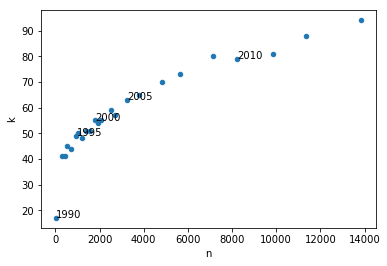

In [144]:

ax = df.plot.scatter('n','k')

list(df.k)

for index, row in df.iterrows():
    if row['doc__PY'] % 5 ==0:
        ax.text(row['n'],row['k'],row['doc__PY'])



plt.show()

In [97]:
qid = run.query.id
y = 1990
docs = Doc.objects.filter(query=qid,relevant=True,content__iregex='\w',PY=y)


docs.distinct().count()

37